In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
gdf = gpd.read_file('India-State-and-Country-Shapefile-Updated-Jan-2020/state')

In [3]:
gdf.head()

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."


In [4]:
crop_production = pd.read_csv("data/district_season_crop_1997.csv")
crop_production['Production'] = crop_production.groupby(['State_Name', 'Crop_Year'])['Production'].transform(lambda x: x.fillna(x.mean()))
crop_production = crop_production[(crop_production['Crop_Year'] >= 2001) & (crop_production['Crop_Year'] <= 2011)]

In [5]:
crop_production_2001 = crop_production[crop_production['Crop_Year'] == 2001]
crop_production_2001 = crop_production_2001.groupby(['State_Name'])['Production'].sum().reset_index()

crop_production_2011 = crop_production[crop_production['Crop_Year'] == 2011]
crop_production_2011 = crop_production_2011.groupby(['State_Name'])['Production'].sum().reset_index()

In [6]:
state_replacements = {
    'Andaman & Nicobar' : 'Andaman and Nicobar Islands',
    'Chhattishgarh' : 'Chhattisgarh',
    'Daman and Diu and Dadra and Nagar Haveli' : 'Dadra and Nagar Haveli',
    'Telengana' : 'Telangana',
    'Tamilnadu' : 'Tamil Nadu'
}

In [7]:
for (o, r) in state_replacements.items():
    gdf['State_Name'].replace(to_replace=o, value=r, inplace=True)

In [8]:
gdf_2001 = gdf.merge(crop_production_2001, left_on='State_Name', right_on='State_Name', how='left')
gdf_2011 = gdf.merge(crop_production_2011, left_on='State_Name', right_on='State_Name', how='left')

In [9]:
def log_normalize(df, column):
    df[column] = np.log(df[column])
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df

In [10]:
gdf_2001['Production'] = gdf_2001['Production'].fillna(1)
gdf_2001 = log_normalize(gdf_2001, 'Production')

gdf_2011['Production'] = gdf_2011['Production'].fillna(1)
gdf_2011 = log_normalize(gdf_2011, 'Production')


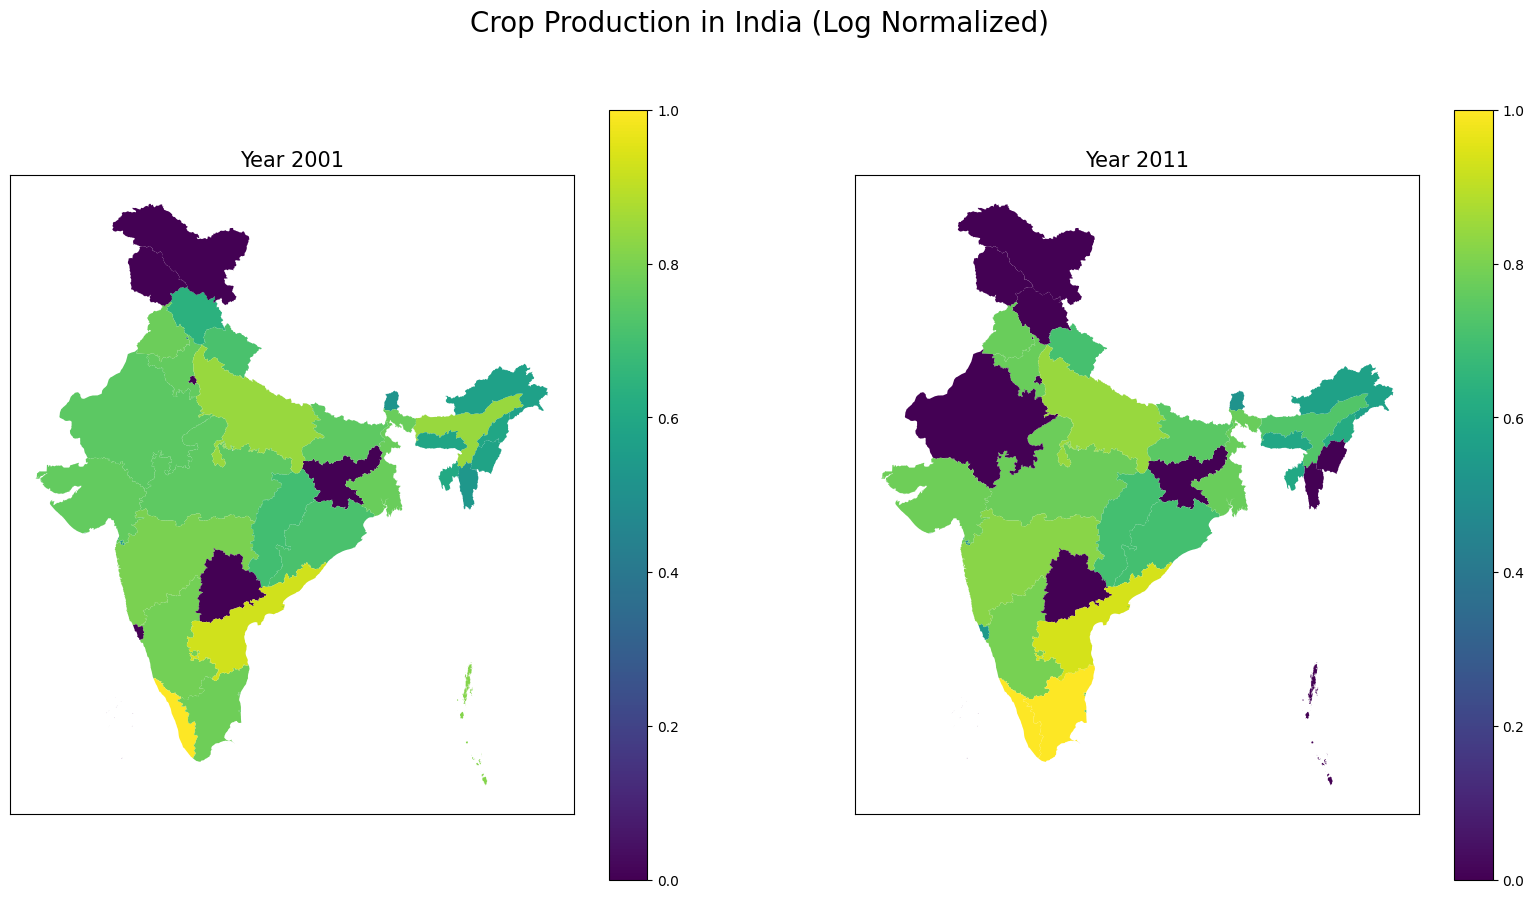

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

gdf_2001.plot(column='Production', ax=ax[0], legend=True, label='2001')
gdf_2011.plot(column='Production', ax=ax[1], legend=True, label='2011')

ax[0].set_xticks([])  
ax[0].set_yticks([]) 
ax[0].set_title("Year 2001", fontsize=15)

ax[1].set_xticks([])  
ax[1].set_yticks([]) 
ax[1].set_title("Year 2011", fontsize=15)

plt.suptitle('Crop Production in India (Log Normalized)', fontsize=20)
plt.show()